<a href="https://colab.research.google.com/github/DR-Sarvamangala/NLP_applications/blob/main/conditional_image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional image generation

Conditional image generation allows you to generate images from a text prompt. The text is converted into embeddings which are used to condition the model to generate an image from noise.

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is the easiest way to use a pre-trained diffusion system for inference.

Start by creating an instance of [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and specify which pipeline [checkpoint](https://huggingface.co/models?library=diffusers&sort=downloads) you would like to download.

In this guide, you'll use [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for text-to-image generation with [`runwayml/stable-diffusion-v1-5`](https://huggingface.co/runwayml/stable-diffusion-v1-5):

In [ ]:
!pip install diffusers
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) downloads and caches all modeling, tokenization, and scheduling components.
Because the model consists of roughly 1.4 billion parameters, we strongly recommend running it on a GPU.
You can move the generator object to a GPU, just like you would in PyTorch:

In [ ]:
generator.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now you can use the `generator` on your text prompt:

In [ ]:
image = generator("An image of a dinosaur laughing").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

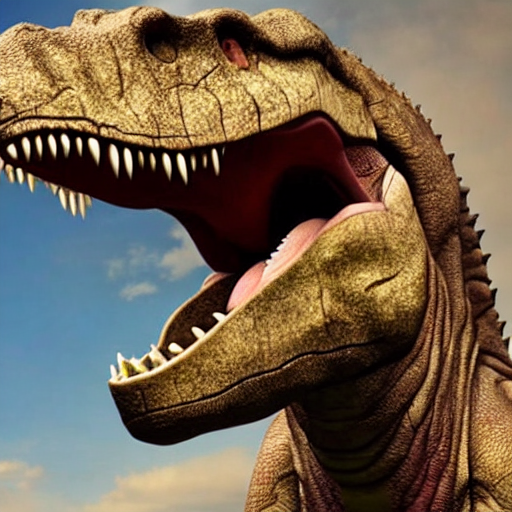

In [ ]:
image

The output is by default wrapped into a [`PIL.Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=image#the-image-class) object.

You can save the image by calling:

In [ ]:
image.save("image_of_squirrel_painting.png")

Try out the Spaces below, and feel free to play around with the guidance scale parameter to see how it affects the image quality!

<iframe
	src="https://stabilityai-stable-diffusion.hf.space"
	frameborder="0"
	width="850"
	height="500"
></iframe>